In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
#reading the dataset
df = pd.read_csv('Car_Insurance_Claim 1.csv')

In [3]:
#showing the first 5 rows of dataset
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


In [4]:
#information of the type and numbers of every column of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  int64  
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  int64  
 11  CHILDREN             10000 non-null  int64  
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [3]:
df = df.drop(['ID'], axis=1) #droping the id column

In [ ]:
df.describe() #iformation about numerical columns

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [5]:
# Check for missing values
df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [6]:
#filling the missing values for credit score and annual mileage with mean
df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].mean(), inplace=True)
df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].mean(), inplace=True)
df.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [7]:
#checking for duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
#preprocessing
#converting categorical columns to numerical columns using labelencoder
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

ValueError: num must be an integer with 1 <= num <= 9, not 10

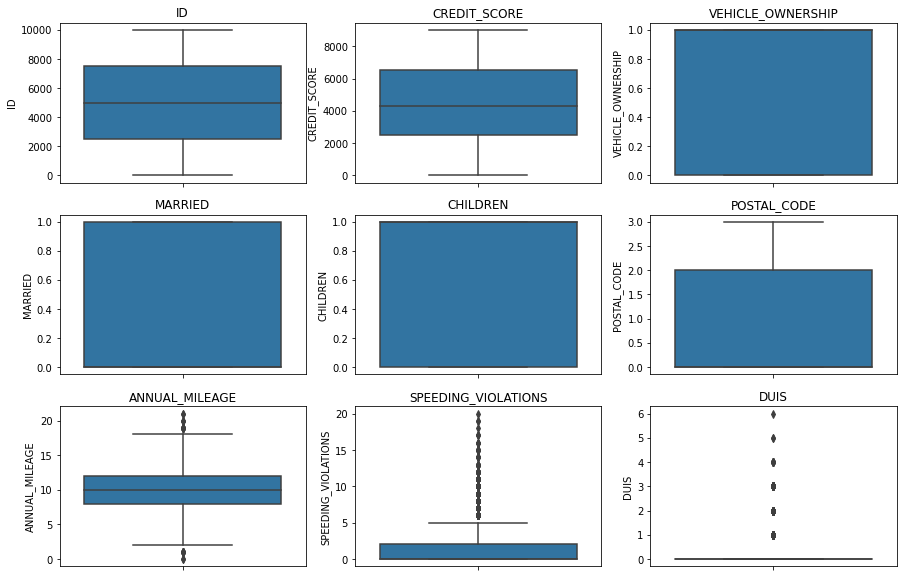

In [9]:

# Plot boxplots for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [10]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for numerical columns
numerical_columns = ['AGE', 'CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']
for col in numerical_columns:
    df = remove_outliers(df, col)


OUTCOME
0    0.597997
1    0.402003
Name: proportion, dtype: float64


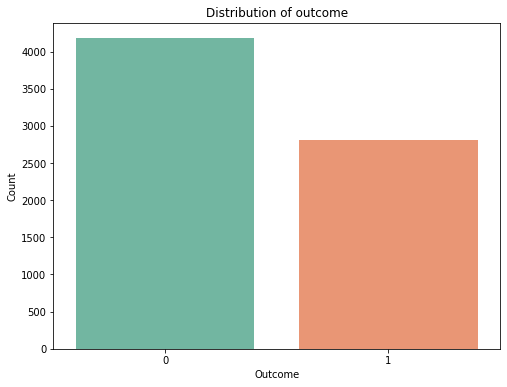

In [ ]:
# Plot boxplots for numerical columns after removing outliers
outcome_distribution = df['OUTCOME'].value_counts(normalize=True)
print(outcome_distribution)

plt.figure(figsize=(8, 6))
sns.countplot(x='OUTCOME', data=df, palette='Set2')
plt.title('Distribution of outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()



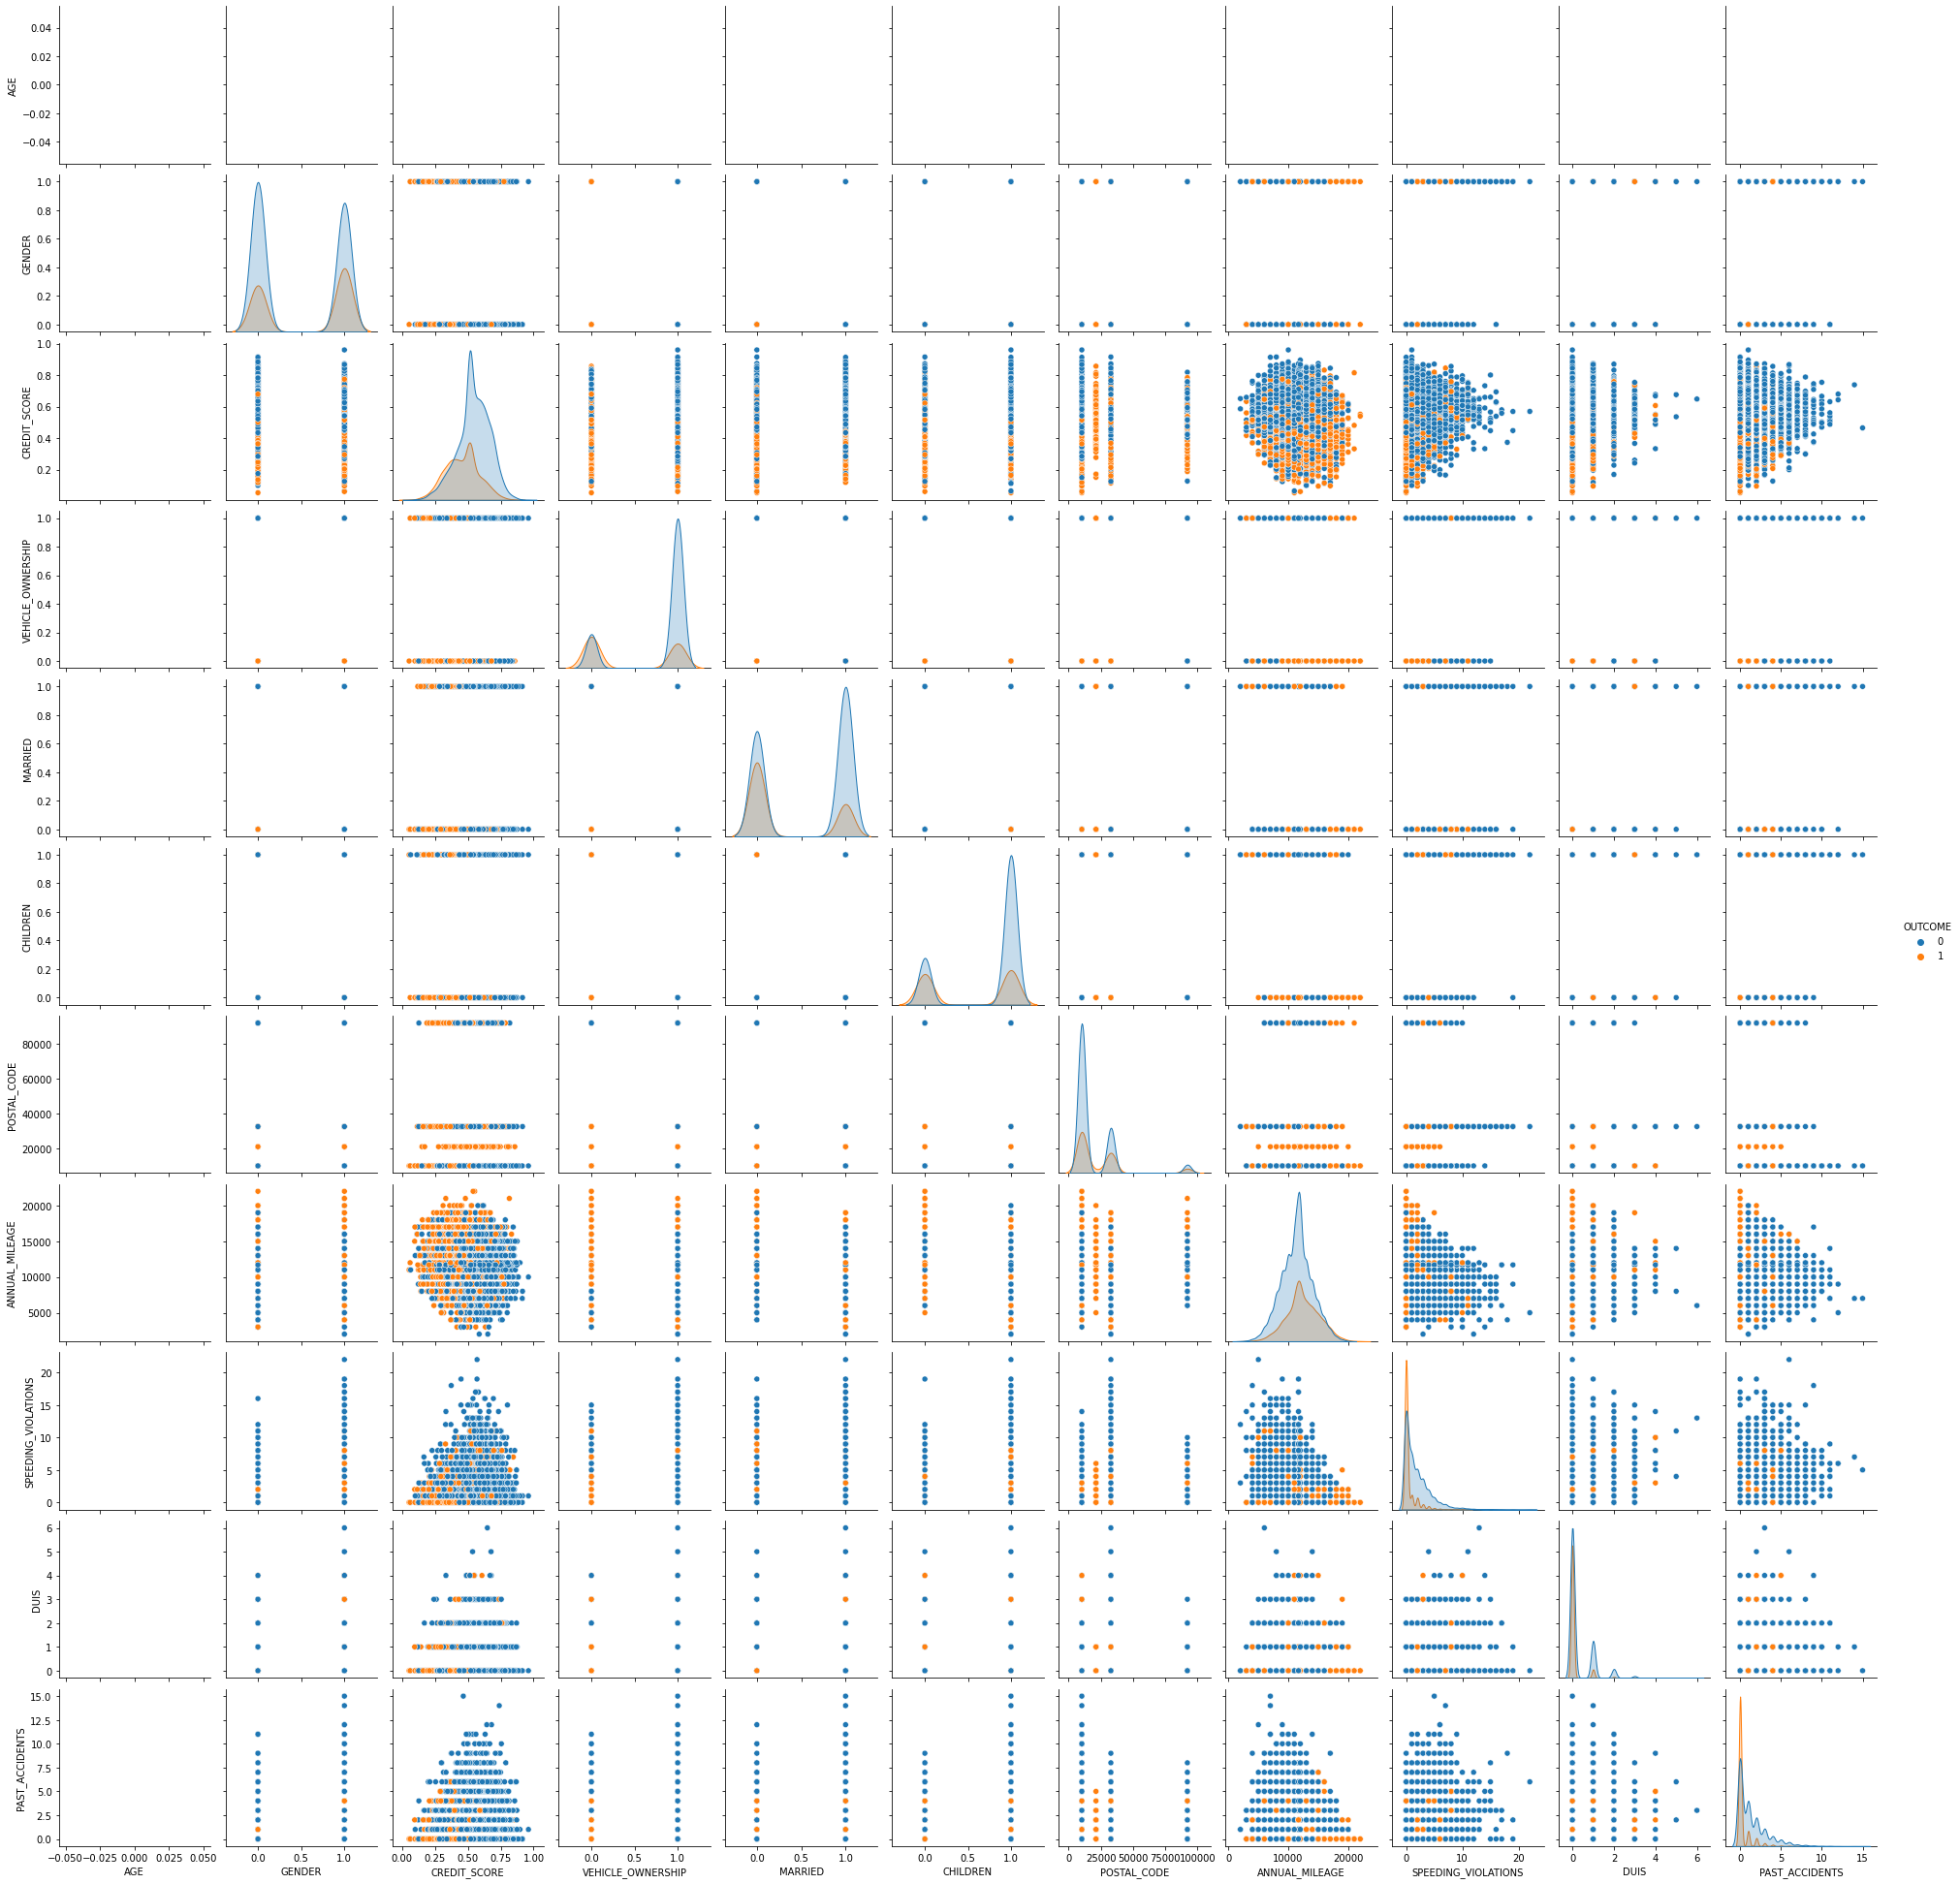

In [ ]:
sns.pairplot(df, hue='OUTCOME', diag_kind="kde") #pairplot of the dataset

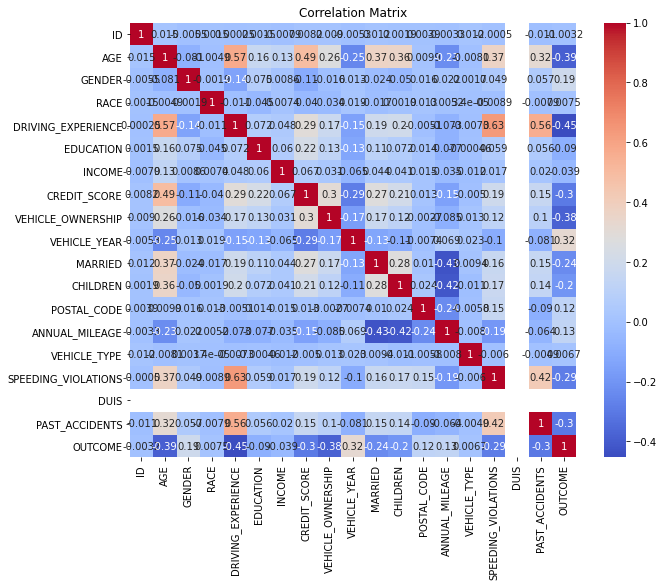

In [12]:
#EDA
#correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = df.drop(columns=['OUTCOME']) #features
y = df['OUTCOME'] #target
#splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#Balancing the dataset
smote = SMOTE()
X_train_balamced, y_train_balamced = smote.fit_resample(X_train, y_train)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [ ]:
#Decision Tree Classifier
model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=2, min_samples_split=10, random_state=42)
model.fit(X_train_balamced, y_train_balamced)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
#predicting the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8121125417262757

In [17]:
#SVM
model_svm = SVC()
model_svm.fit(X_train_balamced, y_train_balamced)

y_pred_svm = model_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
accuracy

0.6404387219837864

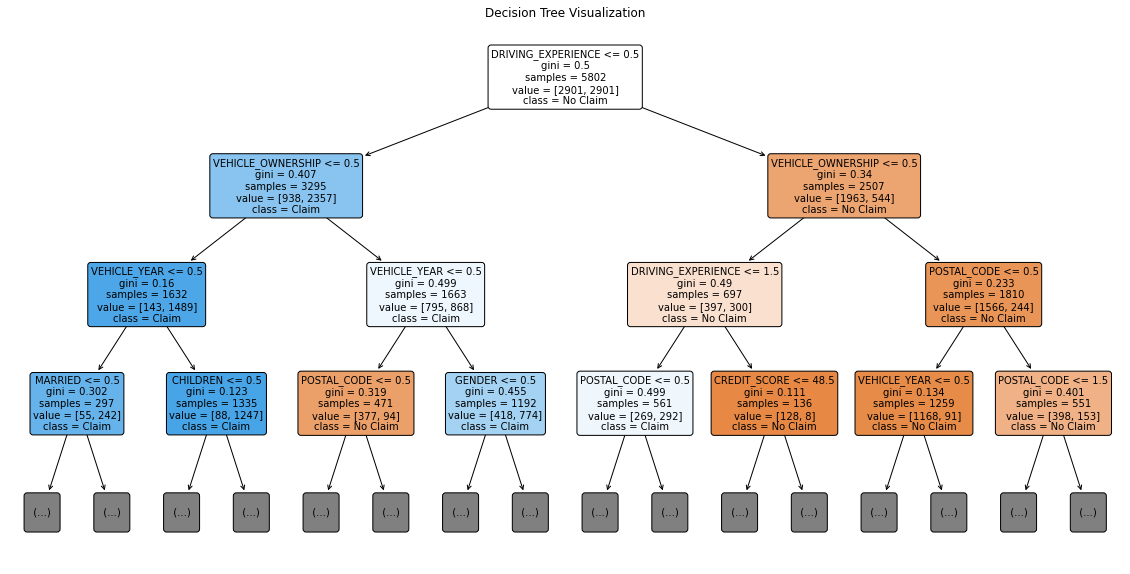

In [60]:
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(20, 10))  # Adjust the figure size for better readability
plot_tree(
    model,  # The trained Decision Tree model
    filled=True,  # Fill the nodes with colors based on the majority class
    feature_names=X.columns,  # Use feature names for labeling
    class_names=['No Claim', 'Claim'],  # Use class names for labeling (if binary classification)
    rounded=True,  # Use rounded corners for the nodes
    fontsize=10,  # Adjust font size for readability
    max_depth=3,  # Limit the depth of the tree for better visualization (optional)
)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

#GridSearchCV for SVM
param = {   'C': [0.1,1,10],
            'gamma': [0.1,1,10],
            'kernel': ['linear', 'rbf']
}

sv = SVC(probability=False, random_state=42)

grid_search = GridSearchCV(sv, param, cv=5, scoring='accuracy', n_jobs=-1, verbose=2 )
grid_search.fit(X_train_balamced, y_train_balamced)

print("Best parameters for svc model :", grid_search.best_params_)

In [17]:
from sklearn.metrics import classification_report



# Train the SVM model with the best parameters
best_svm_model = SVC(C=10, gamma=1,kernel='rbf' , random_state=42)
best_svm_model.fit(X_train_balamced, y_train_balamced)

# Make predictions
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Model Evaluation:")
print(classification_report(y_test, y_pred_svm))

SVM Model Evaluation:
              precision    recall  f1-score   support

           0       0.62      0.98      0.76      1276
           1       0.73      0.07      0.12       818

    accuracy                           0.63      2094
   macro avg       0.68      0.53      0.44      2094
weighted avg       0.66      0.63      0.51      2094

